In [2]:
from network.srcnn import networkInference

import numpy
import math
import cv2

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
IMG_NAME = "./imageTrain/yayoi_133.png"

FILEPATH_WEIGHT = "./preTrained/"
FILENAME_WEIGHT = "srcnn.h5"

#FILEPATH_WEIGHT = ""
#FILENAME_WEIGHT = "yayoi_2018-07-06_051313-.h5"

OPENCV_NAME = "opencv.bmp"
SRCNN_NAME = "srcnn.bmp"

INTERPOLATION = cv2.INTER_CUBIC
scale = 2

In [7]:
tick1 = cv2.getTickCount()

In [8]:
srcnn_model = networkInference()
srcnn_model.load_weights(FILEPATH_WEIGHT + FILENAME_WEIGHT)

/home/jovyan/work/network/srcnn.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
  activation='relu', border_mode='valid', bias=True, input_shape=(None, None, 1)))
/home/jovyan/work/network/srcnn.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
  activation='relu', border_mode='same', bias=True))
/home/jovyan/work/network/srcnn.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
  activation='linear', border_mode='valid', bias=True))


In [9]:
img = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
shape = img.shape

Y_img = cv2.resize(img[:, :, 0], (int(shape[1] * scale), int(shape[0] * scale)), INTERPOLATION)
img = cv2.resize(img, (int(shape[1] * scale), int(shape[0] * scale)), INTERPOLATION)

#Y_img = cv2.resize(img[:, :, 0], (int(shape[1] / sizeMux), int(shape[0] / sizeMux)), cv2.INTER_CUBIC)
#Y_img = cv2.resize(Y_img, (shape[1], shape[0]), cv2.INTER_CUBIC)
#img[:, :, 0] = Y_img

img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
cv2.imwrite(OPENCV_NAME, img)

True

In [10]:
Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
Y[0, :, :, 0] = Y_img.astype(float) / 255.

pre = srcnn_model.predict(Y, batch_size=1) * 255.
pre[pre[:] > 255] = 255
pre[pre[:] < 0] = 0

pre = pre.astype(numpy.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
img[6: -6, 6: -6, 0] = pre[0, :, :, 0]
img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
cv2.imwrite(SRCNN_NAME, img)

True

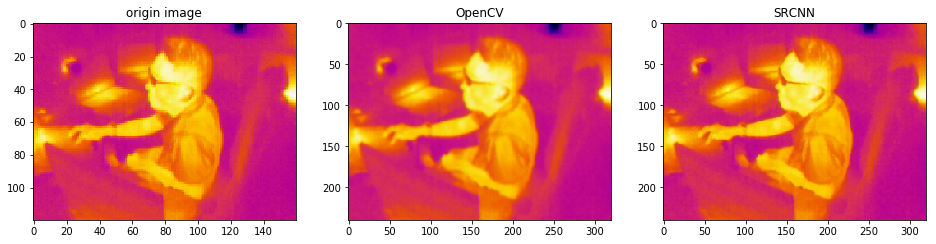

In [11]:
# display image
im1 = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.imread(OPENCV_NAME, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.imread(SRCNN_NAME, cv2.IMREAD_COLOR)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

plt.figure(num='srcnn',figsize=(16,16))

plt.subplot(1,3,1)
plt.title('origin image')
plt.imshow(im1)

plt.subplot(1,3,2)
plt.title('OpenCV')
plt.imshow(im2)

plt.subplot(1,3,3)
plt.title('SRCNN')
plt.imshow(im3)

In [12]:
tick2 = cv2.getTickCount()
tick = math.floor( ((tick2 - tick1) * 1000) / cv2.getTickFrequency())
print("processed time: " + str(tick) + " ms")

processed time: 3411 ms
